# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

The amount of policies are hard coded to not be higher than 10.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

Model will run for 80 ticks where each tick is 1/4 of a year.

# Running the model and visualizing the model domain and social network over time

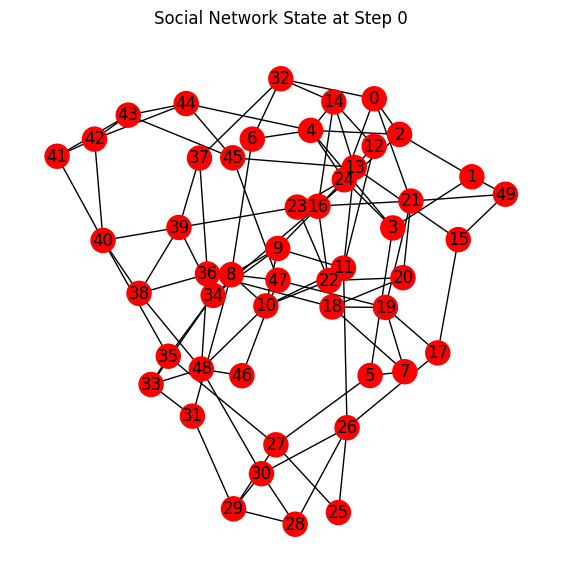

<Figure size 1000x600 with 0 Axes>

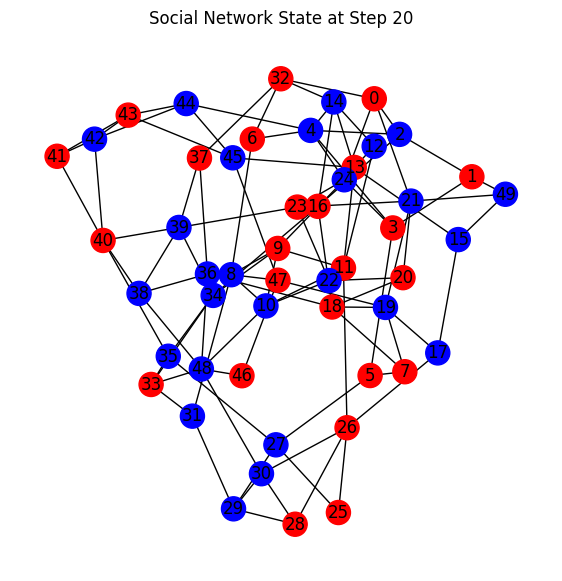

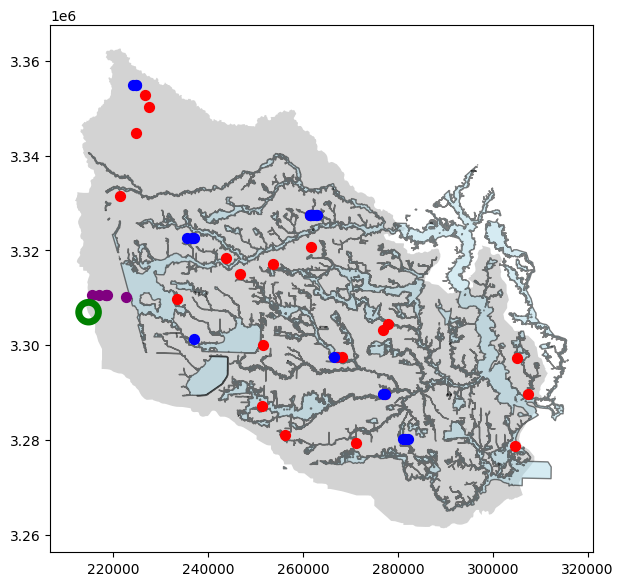

In [6]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from functions import map_domain_gdf, floodplain_gdf

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, number_of_zones=2, flood_map_choice="harvey", network="watts_strogatz", adaptation_threshold=0.2) # flood_map_choice can be "harvey", "100yr", or "500yr"
# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status
    household_agents = []
    goevernment_implemetaitons = [] # does not do much now
    for agent in model.schedule.agents:
        if agent.type == 'household':
            household_agents.append(agent)
        if agent.type == "implementation":
            goevernment_implemetaitons.append(agent)
        
    colors = ['blue' if agent.is_adapted else 'red' for agent in household_agents]

    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(model.number_of_steps):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if step  == 19:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        #model.plot_model_domain_with_agents()
        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

# Plot the model domain
fig, ax = plt.subplots(figsize=(7, 7))
map_domain_gdf.plot(ax=ax, color='lightgrey')
#Plot the floodplain
floodplain_gdf.plot(ax=ax, color='lightblue', edgecolor='k', alpha=0.5)
for agent in model.schedule.agents:
    if agent.type == "household" and agent.is_adapted == False:
        #get position on the map
        ax.scatter(agent.location.x, agent.location.y, color='red', s=50)  # Bigger, hollow circle
    elif agent.type == 'household':
        if agent in model.adapted_because_government:
            ax.scatter(agent.location.x, agent.location.y, color='purple', s=50)  # Smaller, filled circle
        else:
            ax.scatter(agent.location.x, agent.location.y, color='blue', s=50)  # Smaller, filled circle
    elif agent.type == "implementation":
        if agent.policy == "Dijks":
            ax.scatter(agent.location.x, agent.location.y, facecolors = "none", linewidths=5, edgecolors='green', s=200) 
        elif agent.policy == "Water locks":
            ax.scatter(agent.location.x, agent.location.y, facecolors = "none", linewidths=5, edgecolors='yellow', s=300) 

    

In [7]:

agent_data = model.datacollector.get_agent_vars_dataframe()
household_data = agent_data
government_data = agent_data
implementation_data = agent_data

#take out anaything that is not government
for i, j in enumerate(agent_data.Type[5]):
    if j != "household":
        household_data = household_data.drop(i, level='AgentID') #drop media and government
    if j != 'government':
        government_data = government_data.drop(i, level='AgentID')
    if j != 'implementation':
        implementation_data = implementation_data.drop(i, level='AgentID')

household_data.head()

Type  FloodDepthEstimated  FloodDamageEstimated  \
Step AgentID                                                         
0    0        household             0.357226              0.468569   
     1        household             0.000000              0.000000   
     2        household             0.000000              0.000000   
     3        household             0.000000              0.000000   
     4        household             0.000000              0.000000   

              FloodDepthActual  FloodDamageActual IsAdapted   Money  \
Step AgentID                                                          
0    0                     0.0                0.0     False  5654.0   
     1                     0.0                0.0     False  1115.0   
     2                     0.0                0.0     False  1703.0   
     3                     0.0                0.0     False  2898.0   
     4                     0.0                0.0     False  7219.0   

              FriendsCount                                       location  
Step AgentID                                                               
0    0                 4.0   POINT (305086.5801824932 3297300.3352472787)  
     1                 3.0  POINT (236744.71627396246 3322555.0930976807)  
     2                 4.0   POINT (216904.9420406528 3310707.0956871044)  
     3                 4.0   POINT (281310.5817396284 3280254.3250497594)  
     4                 6.0  POINT (224559.87405420607 3354953.4577904553)

In [8]:
import pandas as pd
import numpy as np

household_data_per_agent = {}

for i in range(model.number_of_households):
    household_data_per_agent[i] = []

loop = 0
for i in household_data.Money:
    if loop == (model.number_of_households-1):
        loop = 0
        
    household_data_per_agent[loop].append(i)
    loop += 1
    
print(f"I have a list of length: {len(household_data_per_agent[1])} this is the list: {household_data_per_agent[1]}")

household_data_per_agent_dataset = pd.DataFrame([household_data_per_agent])
household_data_per_agent_dataset = household_data_per_agent_dataset.transpose()
household_data_per_agent_dataset.columns = ['Money']
household_data_per_agent_dataset.index.name = 'Agents'
household_data_per_agent_dataset.head()

I have a list of length: 21 this is the list: [1115.0, 6658.0, 7263.0, 9120.0, 9801.0, 10081.0, 11195.0, 9581.0, 14183.0, 8403.0, 16468.0, 11903.0, 18393.0, 17597.0, 15266.0, 19948.0, 21716.0, 22247.0, 16362.0, 12741.0, 17056.0]


Money
Agents                                                   
0       [5654.0, 6715.0, 8610.0, 9060.0, 9408.0, 9850....
1       [1115.0, 6658.0, 7263.0, 9120.0, 9801.0, 10081...
2       [1703.0, 980.0, 7708.0, 8333.0, 10377.0, 11687...
3       [2898.0, 1453.0, 1807.0, 7786.0, 9916.0, 11068...
4       [7219.0, 4879.0, 2195.0, 1430.0, 8226.0, 10269...

In [9]:
government_data.head()

Type  FloodDepthEstimated  FloodDamageEstimated  \
Step AgentID                                                          
0    51       government                  NaN                   NaN   
1    51       government                  NaN                   NaN   
2    51       government                  NaN                   NaN   
3    51       government                  NaN                   NaN   
4    51       government                  NaN                   NaN   

              FloodDepthActual  FloodDamageActual IsAdapted      Money  \
Step AgentID                                                             
0    51                    NaN                NaN      None  3000000.0   
1    51                    NaN                NaN      None  2974870.0   
2    51                    NaN                NaN      None  3005376.0   
3    51                    NaN                NaN      None  3038262.0   
4    51                    NaN                NaN      None  3072986.0   

              FriendsCount location  
Step AgentID                         
0    51                NaN     None  
1    51                NaN     None  
2    51                NaN     None  
3    51                NaN     None  
4    51                NaN     None

In [7]:
implementation_data.tail()

Type  FloodDepthEstimated  FloodDamageEstimated  \
Step AgentID                                                              
17   53       implementation                  NaN                   NaN   
18   52       implementation                  NaN                   NaN   
     53       implementation                  NaN                   NaN   
19   52       implementation                  NaN                   NaN   
     53       implementation                  NaN                   NaN   

              FloodDepthActual  FloodDamageActual IsAdapted  \
Step AgentID                                                  
17   53                    NaN                NaN      None   
18   52                    NaN                NaN      None   
     53                    NaN                NaN      None   
19   52                    NaN                NaN      None   
     53                    NaN                NaN      None   

             AdaptedByGovernmentImplementation  Money  FriendsCount  \
Step AgentID                                                          
17   53                                   None    NaN           NaN   
18   52                                   None    NaN           NaN   
     53                                   None    NaN           NaN   
19   52                                   None    NaN           NaN   
     53                                   None    NaN           NaN   

                                                   location  
Step AgentID                                                 
17   53        POINT (235218.85304161898 3296809.060126258)  
18   52       POINT (226044.51178294903 3322671.9974940047)  
     53        POINT (235218.85304161898 3296809.060126258)  
19   52       POINT (226044.51178294903 3322671.9974940047)  
     53        POINT (235218.85304161898 3296809.060126258)

In [10]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

total_adapted_households  media_coverage  number_of_floods current_policy  \
0                          0               0                 0      No policy   
1                          8               0                 0      No policy   
2                          8               0                 0      No policy   
3                          8               0                 0      No policy   
4                          8               0                 0      No policy   
5                          8               0                 0      No policy   
6                          4               0                 0      No policy   
7                          7               0                 0      No policy   
8                          7               0                 0      No policy   
9                          7               0                 0      No policy   
10                         7               0                 0      No policy   
11                         7               0                 1      No policy   
12                        21               1                 1      No policy   
13                        25               1                 1      No policy   
14                        25               1                 1      No policy   
15                        25               1                 1      No policy   
16                        25               1                 1          Dijks   
17                        20               1                 1          Dijks   
18                        25               1                 1          Dijks   
19                        26               1                 1          Dijks   

                    AdaptedByGovernmentImplementation  
0   [<agents.Households object at 0x7f7fd2a87d60>,...  
1   [<agents.Households object at 0x7f7fd2a87d60>,...  
2   [<agents.Households object at 0x7f7fd2a87d60>,...  
3   [<agents.Households object at 0x7f7fd2a87d60>,...  
4   [<agents.Households object at 0x7f7fd2a87d60>,...  
5   [<agents.Households object at 0x7f7fd2a87d60>,...  
6   [<agents.Households object at 0x7f7fd2a87d60>,...  
7   [<agents.Households object at 0x7f7fd2a87d60>,...  
8   [<agents.Households object at 0x7f7fd2a87d60>,...  
9   [<agents.Households object at 0x7f7fd2a87d60>,...  
10  [<agents.Households object at 0x7f7fd2a87d60>,...  
11  [<agents.Households object at 0x7f7fd2a87d60>,...  
12  [<agents.Households object at 0x7f7fd2a87d60>,...  
13  [<agents.Households object at 0x7f7fd2a87d60>,...  
14  [<agents.Households object at 0x7f7fd2a87d60>,...  
15  [<agents.Households object at 0x7f7fd2a87d60>,...  
16  [<agents.Households object at 0x7f7fd2a87d60>,...  
17  [<agents.Households object at 0x7f7fd2a87d60>,...  
18  [<agents.Households object at 0x7f7fd2a87d60>,...  
19  [<agents.Households object at 0x7f7fd2a87d60>,...

In [13]:
agents = model_data["AdaptedByGovernmentImplementation"]
agents_adapted_by_government = []

for i in agents:
    if i != None and len(i) > 0:
        agents_adapted_by_government = i

print(agents_adapted_by_government)

print(f"Amount of agents adapted by the government measures {len(agents_adapted_by_government)}")

[<agents.Households object at 0x7f7fd2a87d60>, <agents.Households object at 0x7f7fd2a875e0>, <agents.Households object at 0x7f7fd2a879d0>, <agents.Households object at 0x7f7fd2a877c0>, <agents.Households object at 0x7f7fd2a87e20>, <agents.Households object at 0x7f7fd2a874c0>]
Amount of agents adapted by the government measures 6


<Axes: title={'center': 'Money of each household'}, xlabel='Model tick', ylabel='money(euro)'>

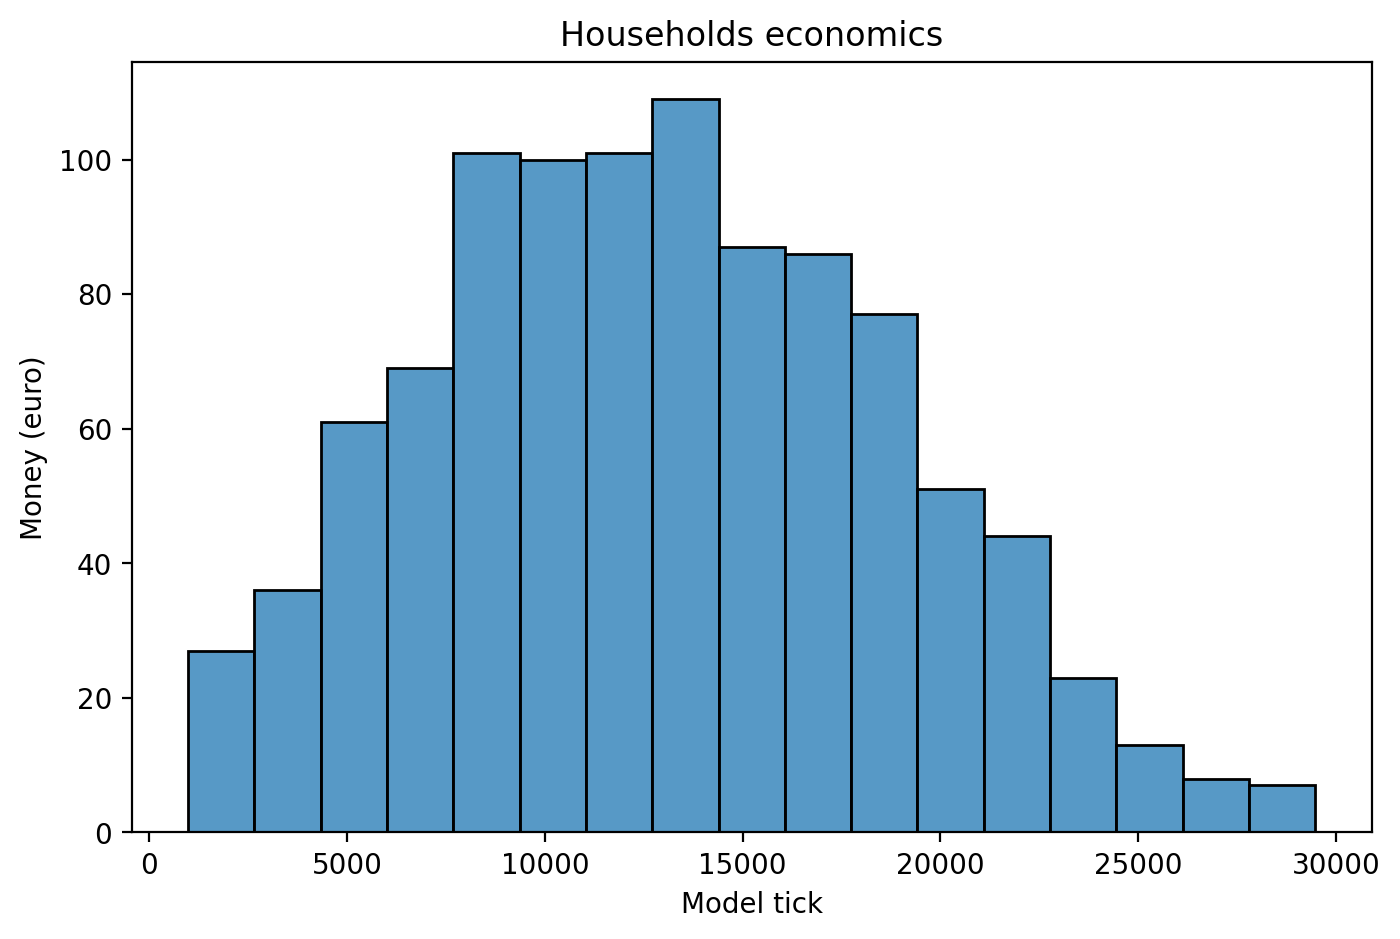

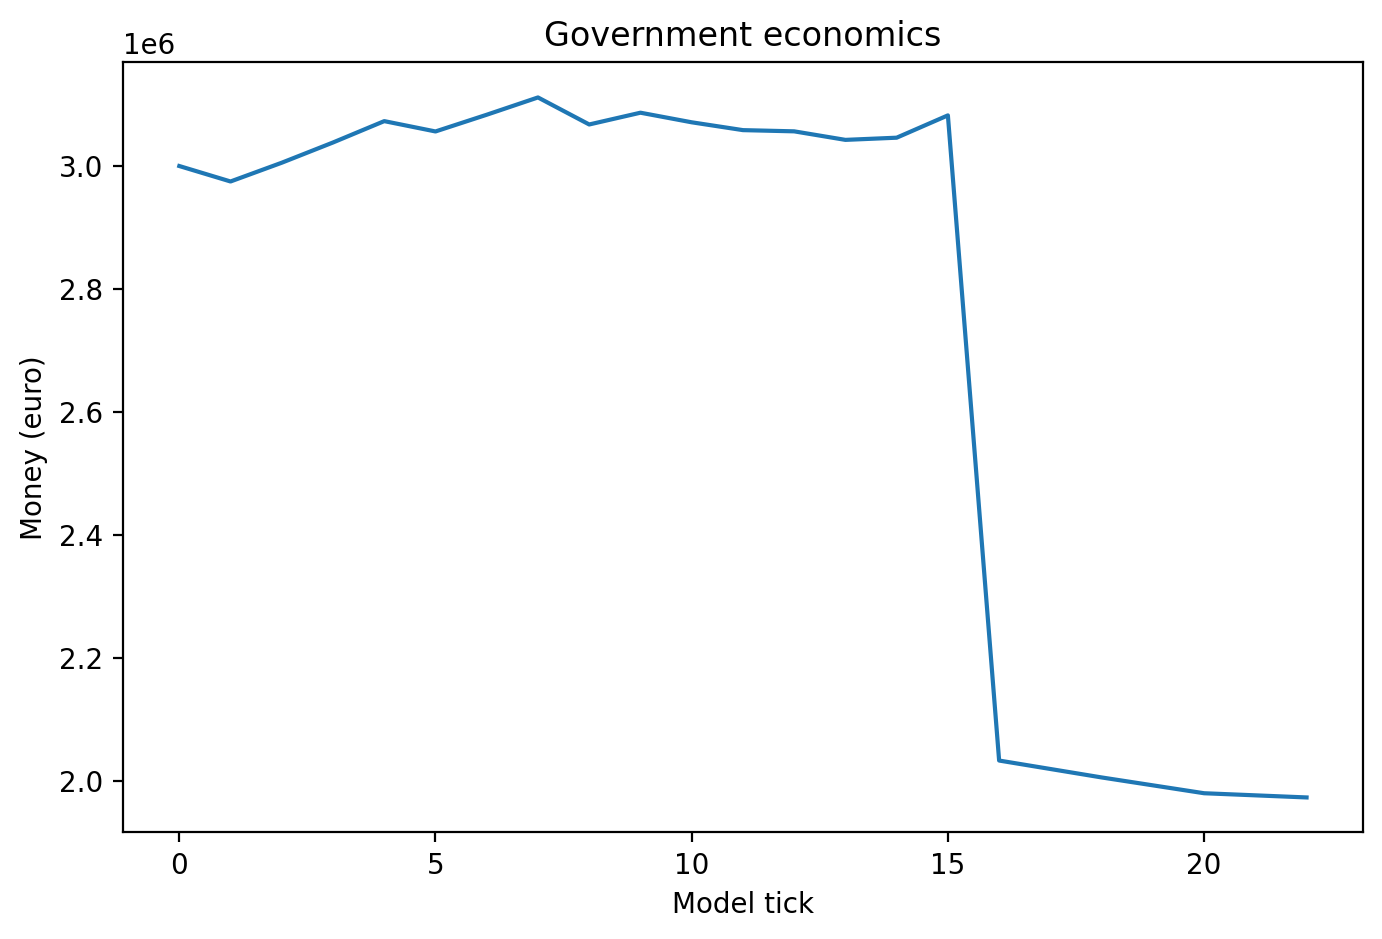

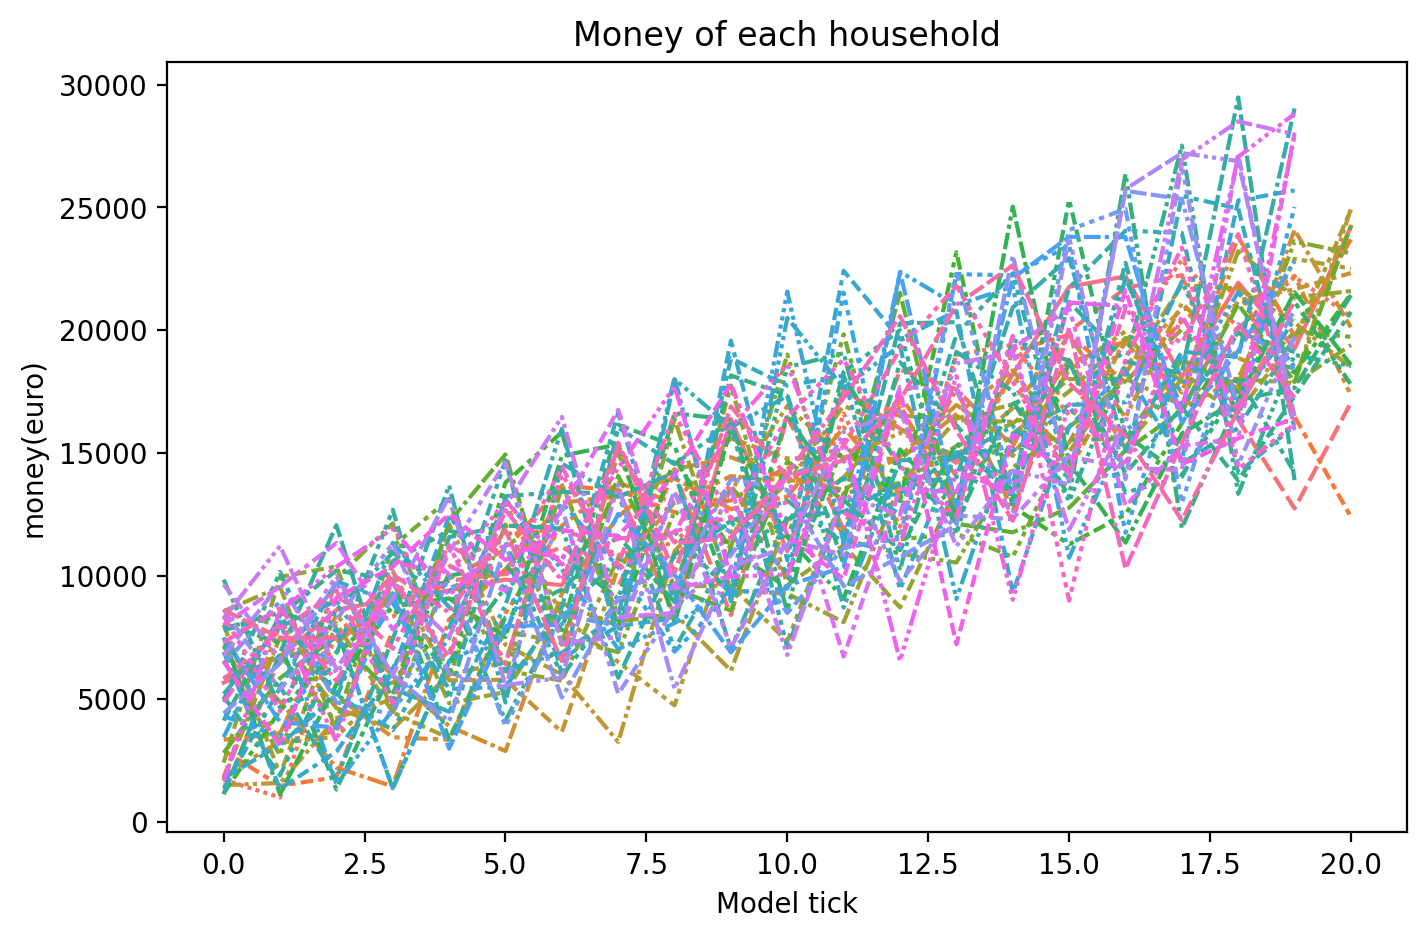

In [14]:
import seaborn as sns

#You will see that agents adapt at step 5 most because than the flood happend and only than the media will have influance on it.

fig, ax = plt.subplots(figsize=(8,5), dpi=200)
plt.title("Households economics")
ax.set_xlabel("Model tick")
ax.set_ylabel("Money (euro)")
sns.histplot(data = household_data.Money )

#You will see that agents adapt at step 5 most because than the flood happend and only than the media will have influance on it.

fig, ax = plt.subplots(figsize=(8,5), dpi=200)
plt.title("Government economics")
ax.set_xlabel("Model tick")
ax.set_ylabel("Money (euro)")
sns.lineplot(data = government_data.Money.to_list() )

#You will see that agents adapt at step 5 most because than the flood happend and only than the media will have influance on it.

fig, ax = plt.subplots(figsize=(8,5), dpi=200)
plt.title("Money of each household")
ax.set_xlabel("Model tick")
ax.set_ylabel("money(euro)")
sns.lineplot(data = household_data_per_agent, legend=None)

<Axes: title={'center': 'Policy changes over time'}, xlabel='Model tick', ylabel='Policy'>

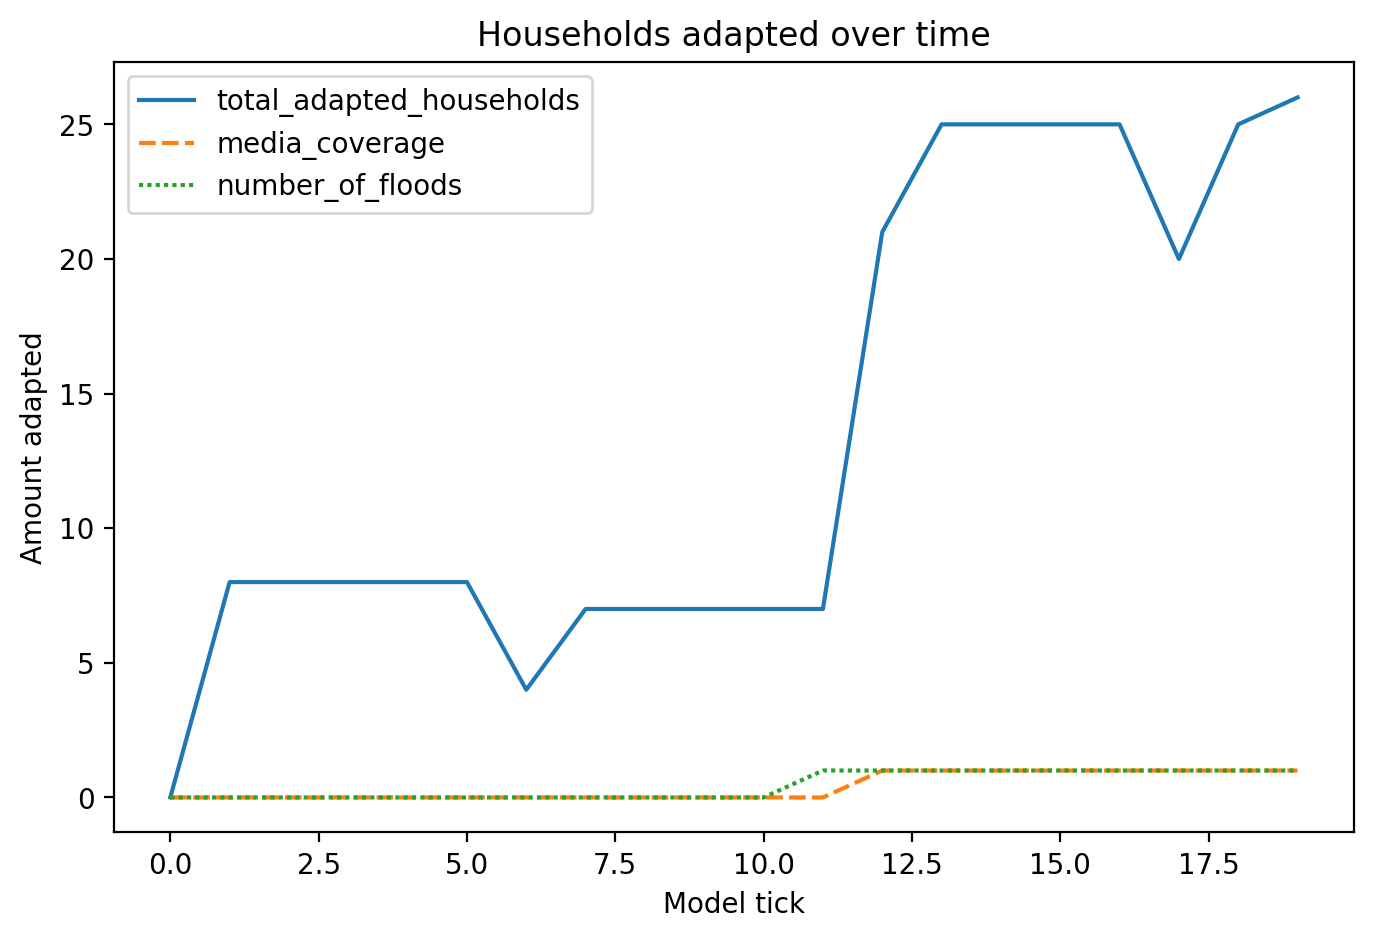

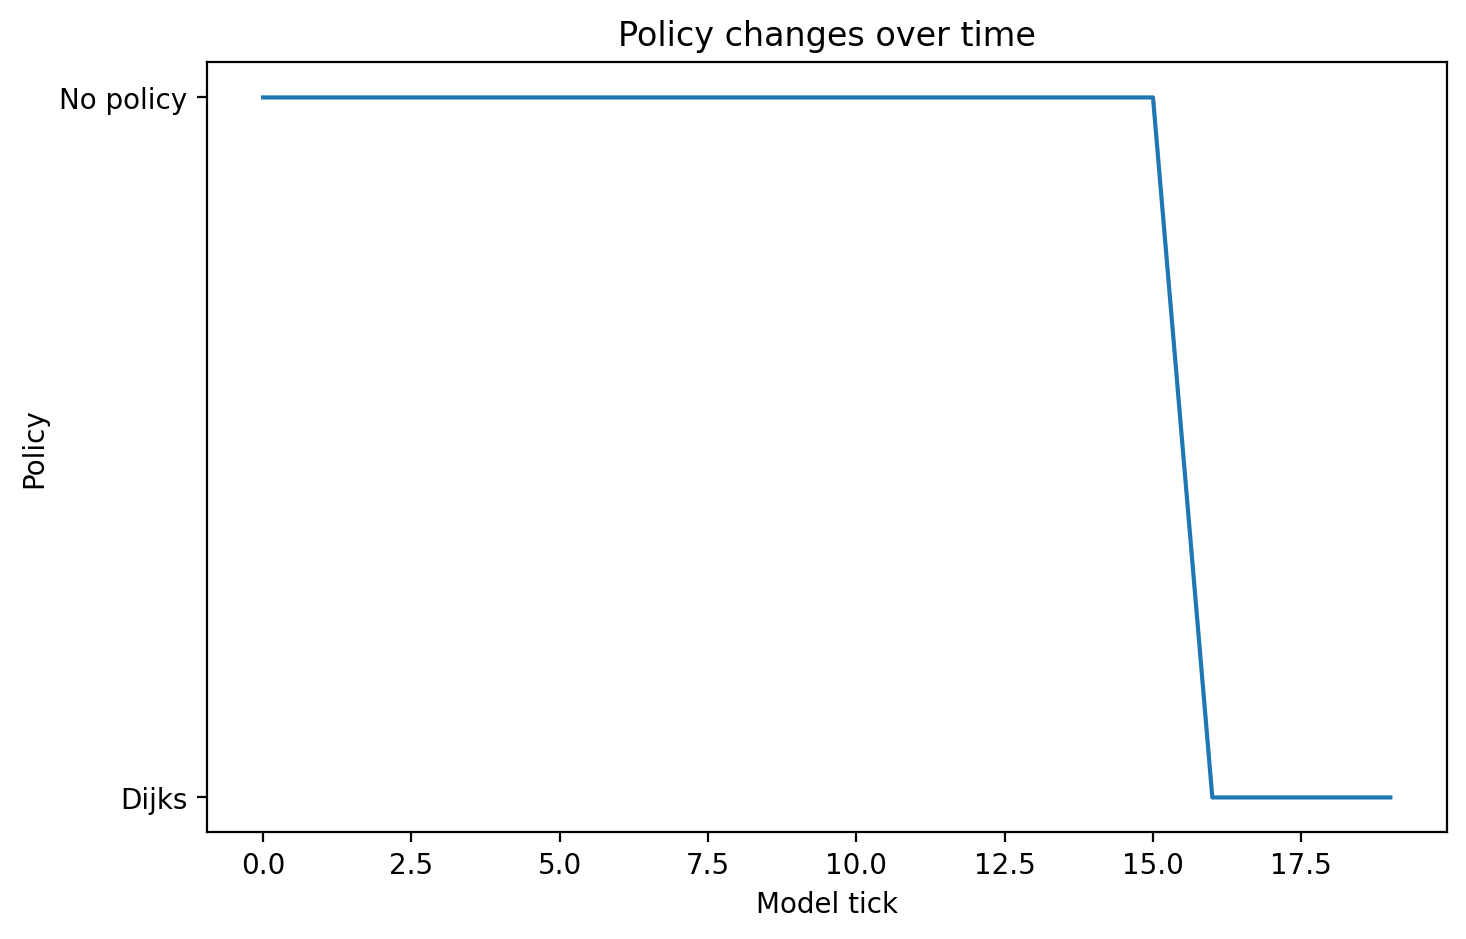

In [15]:
import seaborn as sns

#You will see that agents adapt at step 5 most because than the flood happend and only than the media will have influance on it.

fig, ax = plt.subplots(figsize=(8,5), dpi=200)
plt.title("Households adapted over time")
ax.set_xlabel("Model tick")
ax.set_ylabel("Amount adapted")
sns.lineplot(data = model_data )

fig, ax = plt.subplots(figsize=(8,5), dpi=200)
plt.title("Policy changes over time")
ax.set_xlabel("Model tick")
ax.set_ylabel("Policy")
sns.lineplot(data = model_data.current_policy )
#sns.histplot(data = model_data.current_policy)

In [41]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
from functions import map_domain_gdf, floodplain_gdf

In [44]:
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", adaptation_threshold=0.2) #reset the model

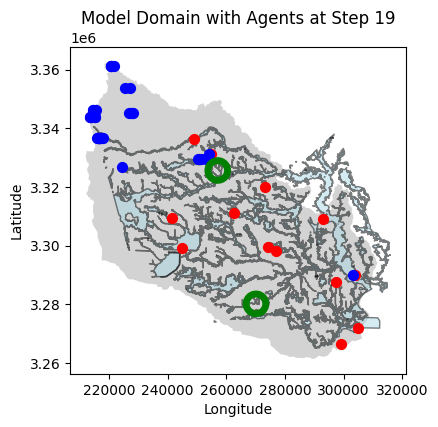

In [45]:
fig, ax = plt.subplots()

# Adjust layout to make room for annotations
fig.subplots_adjust(bottom=0.2)

# Function to plot the grid at each step
def plot_grid(model):
    ax.clear()
    
    # Plot the model domain
    map_domain_gdf.plot(ax=ax, color='lightgrey')
    #Plot the floodplain
    floodplain_gdf.plot(ax=ax, color='lightblue', edgecolor='k', alpha=0.5)

    for agent in model.schedule.agents:
        if agent.type == "household" and agent.is_adapted == False:
            #get position on the map
            ax.scatter(agent.location.x, agent.location.y, color='red', s=50)  # Bigger, hollow circle
        elif agent.type == 'household':
            ax.scatter(agent.location.x, agent.location.y, color='blue', s=50)  # Smaller, filled circle
        elif agent.type == "implementation":
            if agent.policy == "Dijks":
                ax.scatter(agent.location.x, agent.location.y, facecolors = "none", linewidths=5, edgecolors='green', s=200) 
            elif agent.policy == "Water locks":
                ax.scatter(agent.location.x, agent.location.y, facecolors = "none", linewidths=5, edgecolors='yellow', s=300) 
        # Labels and title
        
    plt.title(f'Model Domain with Agents at Step {model.schedule.steps}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

# Update function for the animation
def update(frame):
    plot_grid(model)
    model.step()
    

# Create the animation
anim = FuncAnimation(fig, update, frames=model.number_of_steps-2, repeat=False, interval=200)

# Show the animation
HTML(anim.to_jshtml())